<a href="https://colab.research.google.com/github/MichalRozenwald/epiCausality/blob/main/ml_modeling_bisulfite_samples_data_jeremy_misha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

path = "Data"
celltypes = ["hepg2", "pancreas", "lb"]
N_SAMPLES = 10000
cancer_probs = [0.75, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3]
pancreas_probs = [0.43, 0.43, 0.67, 0.33, 0.5 , 0.33, 0.2 , 0.  , 0.33, 0.  ]
lb_probs = [0.5, 0.0, 0.25, 0.25, 0.25, 0.25, 0.5, 0.25, 0.0, 0.0] # lymphoblastoids
all_probs = [cancer_probs, pancreas_probs, lb_probs]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
! mkdir Data

## Sample data given probs

In [ ]:
np.random.seed(1)
samples = []
for i in range(3):
    probs, celltype = all_probs[i], celltypes[i]
    Xi = np.empty((N_SAMPLES, 10))
    for j, P_methylated in enumerate(probs):
        Xi[:,j] = np.random.choice(2, size=N_SAMPLES, replace=True, p=[1-P_methylated,P_methylated])
    samples.append(Xi)
    np.savetxt(os.path.join(path, celltype + str(N_SAMPLES) + ".csv"), Xi, delimiter=",")

In [ ]:
samples = []
for celltype in celltypes:
    Xi = pd.read_csv(os.path.join(path, celltype + str(N_SAMPLES) + ".csv"), header=None).to_numpy()
    samples.append(Xi)

## Analyze

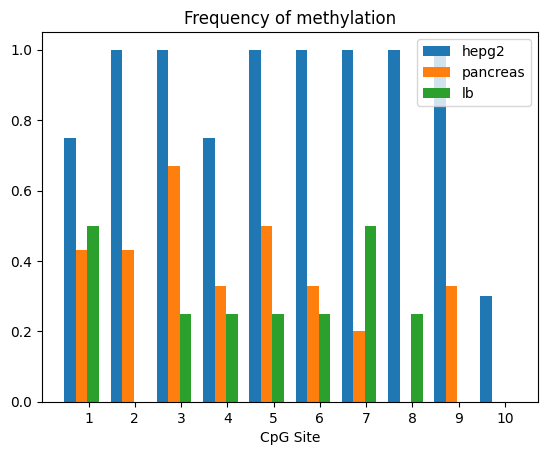

In [ ]:
import matplotlib.pyplot as plt
X_axis = np.arange(10)+1
shifts = [-.4,-.15,.1]
for i in range(3):
    plt.bar(X_axis+shifts[i], all_probs[i], .25,label=celltypes[i])
plt.legend()
plt.title("Frequency of methylation")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


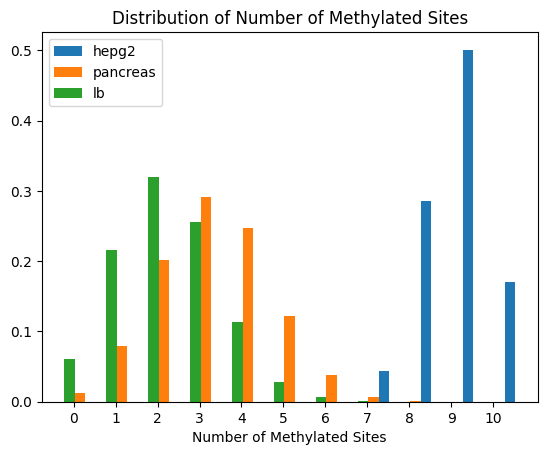

In [ ]:
X_axis2 = np.arange(11)
for i in range(3):
    counts = [np.mean(np.round(np.sum(samples[i], axis=1))==j) for j in range(11)]
    plt.bar(X_axis2-shifts[i], counts, .25,label=celltypes[i])
plt.legend()
plt.title("Distribution of Number of Methylated Sites")
plt.xlabel("Number of Methylated Sites")
plt.xticks(X_axis2)
plt.show()


In [ ]:
X_axis2


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
i

2

In [ ]:
counts = [np.mean(np.round(np.sum(samples[i], axis=1))==j) for j in range(11)]
counts

[0.061, 0.2154, 0.3195, 0.2556, 0.1139, 0.0278, 0.0064, 0.0004, 0.0, 0.0, 0.0]

In [ ]:
 samples

[array([[1., 1., 1., ..., 1., 1., 0.],
        [1., 1., 1., ..., 1., 1., 0.],
        [0., 1., 1., ..., 1., 1., 0.],
        ...,
        [0., 1., 1., ..., 1., 1., 1.],
        [0., 1., 1., ..., 1., 1., 0.],
        [1., 1., 1., ..., 1., 1., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([[1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 1., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

In [ ]:
samples[0]#.sum(axis=0)

array([[1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [ ]:
samples_sums = []
for i in range(3):
  samples_sums.append(np.array([sum(s) for s in samples[i]]))
samples_sums

[array([9., 9., 8., ..., 9., 8., 8.]),
 array([1., 3., 1., ..., 1., 5., 2.]),
 array([2., 3., 1., ..., 1., 2., 2.])]

In [ ]:
 samples_sums

[array([9., 9., 8., ..., 9., 8., 8.]),
 array([1., 3., 1., ..., 1., 5., 2.]),
 array([2., 3., 1., ..., 1., 2., 2.])]

In [ ]:
samples[i]

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.sum(samples[i], axis=1)

array([2., 3., 1., ..., 1., 2., 2.])

In [ ]:
samples_sums[0]

array([9., 9., 8., ..., 9., 8., 8.])

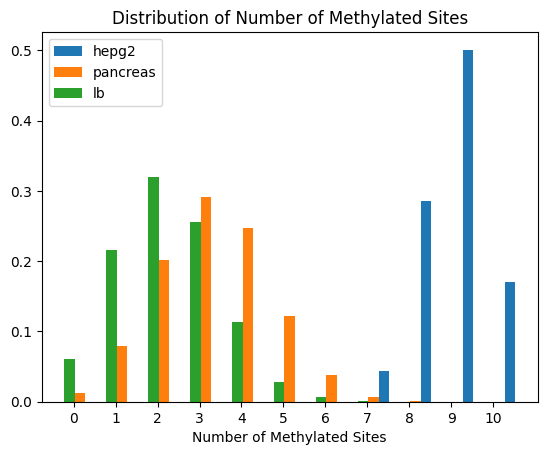

In [ ]:
X_axis2 = np.arange(11)
for i in range(3):
    counts = [np.mean(np.round(samples_sums[i])==j) for j in range(11)]
    plt.bar(X_axis2-shifts[i], counts, .25,label=celltypes[i])
plt.legend()
plt.title("Distribution of Number of Methylated Sites")
plt.xlabel("Number of Methylated Sites")
plt.xticks(X_axis2)
plt.show()


In [ ]:
samples_sums

[array([9., 9., 8., ..., 9., 8., 8.]),
 array([1., 3., 1., ..., 1., 5., 2.]),
 array([2., 3., 1., ..., 1., 2., 2.])]

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
X = np.array(samples_sums).reshape(3*N_SAMPLES,-1)
train_idx, test_idx = train_test_split(np.arange(N_SAMPLES*3), train_size=.75,random_state=42)
train_idx, test_idx

(array([21177, 23942,  1247, ...,   860, 15795, 23654]),
 array([ 2308, 22404, 23397, ..., 28201, 19705, 28313]))

In [ ]:
X

array([[9.],
       [9.],
       [8.],
       ...,
       [1.],
       [2.],
       [2.]])

- regression approach flattens out at 91% accuracy

In [ ]:

Y = np.repeat([0,50,100], N_SAMPLES)
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]

def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

model = LinearRegression().fit(X_train,Y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,Y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,Y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,Y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, Y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

GLM: 77.35%
####
Tree: 77.35%
####
RF: 77.35%
####
GBM: 77.35%
####
NN: 77.35%


In [ ]:

Y = np.repeat([0,50,100], N_SAMPLES)
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]

def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

model = LinearRegression().fit(X_train,Y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,Y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,Y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,Y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, Y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

GLM: 77.35%
####
Tree: 77.35%
####
RF: 77.35%
####
GBM: 77.35%
####
NN: 77.35%


## Model

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
X = np.array(samples).reshape(3*N_SAMPLES,-1)
train_idx, test_idx = train_test_split(np.arange(N_SAMPLES*3), train_size=.75,random_state=42)


- regression approach flattens out at 91% accuracy

In [ ]:

# X = np.array(samples).reshape(3*N_SAMPLES,-1)
# train_idx, test_idx = train_test_split(np.arange(N_SAMPLES*3), train_size=.75,random_state=42)

Y = np.repeat([0,50,100], N_SAMPLES)
X_train, X_test = X[train_idx], X[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]

def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

model = LinearRegression().fit(X_train,Y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,Y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,Y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,Y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, Y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

GLM: 86.87%
####
Tree: 91.13%
####
RF: 91.13%
####
GBM: 91.05%
####
NN: 91.00%


- 3-label classification: almost exactly the same, except logistic regression is better now.

In [ ]:
def predict(f, X, Y):
    preds = f.predict(X)
    return np.mean(preds==Y)*100

Y = np.repeat(celltypes, N_SAMPLES)
Y_train, Y_test = Y[train_idx], Y[test_idx]

# model = LogisticRegression(max_iter=1000).fit(X_train,Y_train)
# print("GLM: {:.2f}".format(predict(model, X_test, Y_test)))

# print("####")
# model = DecisionTreeClassifier().fit(X_train,Y_train)
# print("Tree: {:.2f}".format(predict(model, X_test, Y_test)))
# print("####")
# model = RandomForestClassifier().fit(X_train,Y_train)
# print("RF: {:.2f}".format(predict(model, X_test, Y_test)))
# print("####")
# model = GradientBoostingClassifier().fit(X_train,Y_train)
# print("GBM: {:.2f}".format(predict(model, X_test, Y_test)))
# print("####")
# # Same results regardless of architecture
# model = MLPClassifier(max_iter=1000,hidden_layer_sizes=(10,5)).fit(X_train, Y_train)
# print("NN: {:.2f}".format(predict(model, X_test, Y_test)))

model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,Y_train)
print("Sparse GLM: {:.2f}".format(predict(model, X_test, Y_test)))


Sparse GLM: 91.12


In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[ 8  1  2  3  4  5  6  7  9 10]
 [ 2  9  3  5  6  4  1  7  8 10]
 [ 8  7  1  2  3  4  5  6  9 10]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.82612675  0.          0.        ]
 [ 0.          8.67689941  1.79937736  0.39209448  1.01563401  0.46944182
   0.          0.          8.13790199  0.        ]
 [ 0.23888081  0.          0.          0.          0.          0.
   1.41448469 16.02706242  0.          0.        ]]


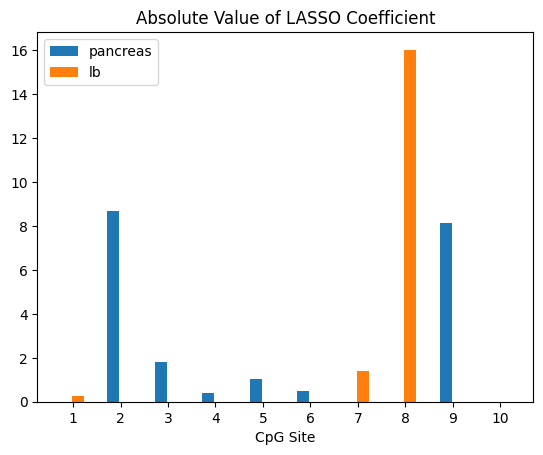

In [ ]:
for i in range(1,3):
    plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


In [ ]:
! pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 10.3 MB/s eta 0:00:00


In [ ]:
import time

import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

import shap

X_train, X_test, Y_train, Y_test = train_test_split(
    *shap.datasets.iris(), test_size=0.2, random_state=0
)

# rather than use the whole training set to estimate expected values, we could summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. But this dataset
# is so small we don't worry about it
# X_train_summary = shap.kmeans(X_train, 50)


def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == Y_test) / len(Y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [ ]:
# K-nearest neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

print_accuracy(knn.predict)
Accuracy = 96.66666666666667%
# Explain a single prediction from the test set
explainer = shap.KernelExplainer(knn.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0, :])
shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# Explain all the predictions in the test set
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# sample order by similarity

# f(x)
# Support vector machine with a linear kernel
svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
svc_linear.fit(X_train, Y_train)
print_accuracy(svc_linear.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
shap_values = explainer.shap_values(X_test)
# this is multiclass so we only visualize the contributions to first class (hence index 0)
shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)


SyntaxError: invalid syntax (<ipython-input-31-60a22548d1e8>, line 6)

In [ ]:
import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

In [ ]:
sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.title("Global SHAP Importances")

## Add a 1D CNN model + interpret

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

# Create dummy data
x_train = np.random.rand(1000, 10, 1)
y_train = np.random.rand(1000) * 100

# Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate feature importance
def score_func(X, y):
    pred = model.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# To fix the error, change the score_func
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Create a copy of x_train reshaped for scoring
x_train_reshaped = x_train.reshape((1000, 10))

# Calculate permutation importance
results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

Epoch 1/10
32/32 [==============================] - 1s 6ms/step - loss: 3177.3743
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 2525.1575
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 1324.3768
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 862.2241
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 854.7893
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 857.3917
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 855.3562
Epoch 8/10
32/32 [==============================] - 0s 10ms/step - loss: 854.7368
Epoch 9/10
32/32 [==============================] - 0s 12ms/step - loss: 854.8135
Epoch 10/10
32/32 [==============================] - 0s 3ms/step
Feature 1 importance: -0.05803384890751033
Feature 2 importance: -0.054135110592563505
Feature 3 importance: -0.15429187633061262
Feature 4 importance: -0.004348219150574551
Feature 5 importance: -0.11

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


Epoch 1/10
30/30 [==============================] - 4s 31ms/step - loss: 3143.1499 - val_loss: 2856.0728
Epoch 2/10
30/30 [==============================] - 0s 12ms/step - loss: 2521.5149 - val_loss: 1883.0583
Epoch 3/10
30/30 [==============================] - 0s 10ms/step - loss: 1345.5724 - val_loss: 889.5591
Epoch 4/10
30/30 [==============================] - 0s 10ms/step - loss: 864.7513 - val_loss: 883.2262
Epoch 5/10
30/30 [==============================] - 0s 6ms/step - loss: 869.0502 - val_loss: 872.8256
Epoch 6/10
30/30 [==============================] - 0s 6ms/step - loss: 862.6459 - val_loss: 871.8748
Epoch 7/10
30/30 [==============================] - 0s 7ms/step - loss: 862.3870 - val_loss: 869.8683
Epoch 8/10
30/30 [==============================] - 0s 8ms/step - loss: 861.8162 - val_loss: 869.7152
Epoch 9/10
30/30 [==============================] - 0s 7ms/step - loss: 861.9338 - val_loss: 868.4548
Epoch 10/10
30/30 [==============================] - 0s 6ms/step - loss: 

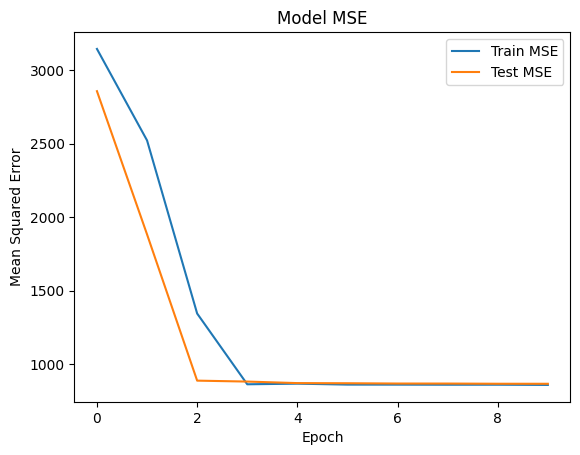

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Create dummy data
x = np.random.rand(1200, 10, 1)
y = np.random.rand(1200) * 100

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and save history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
x_train.shape, x_test.shape[1]

((960, 10, 1), (240, 10, 1))

In [ ]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# To fix the error, change the score_func:
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Create a copy of x_train reshaped for scoring
x_train_reshaped = x_train.reshape((x_train.shape[0], 10))

# Calculate permutation importance
results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

30/30 [==============================] - 0s 3ms/step
Feature 1 importance: -0.005019732614234584
Feature 2 importance: 0.00828311565503057
Feature 3 importance: 0.07689153022866294
Feature 4 importance: 0.08172239872996485
Feature 5 importance: -0.07085640785550425
Feature 6 importance: -0.012578103963081589
Feature 7 importance: -0.07540536234152313
Feature 8 importance: -0.020173557501622953
Feature 9 importance: -0.03310714894869875
Feature 10 importance: 0.002327825352539037


To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:


7/7 [==============================] - 0s 2ms/step


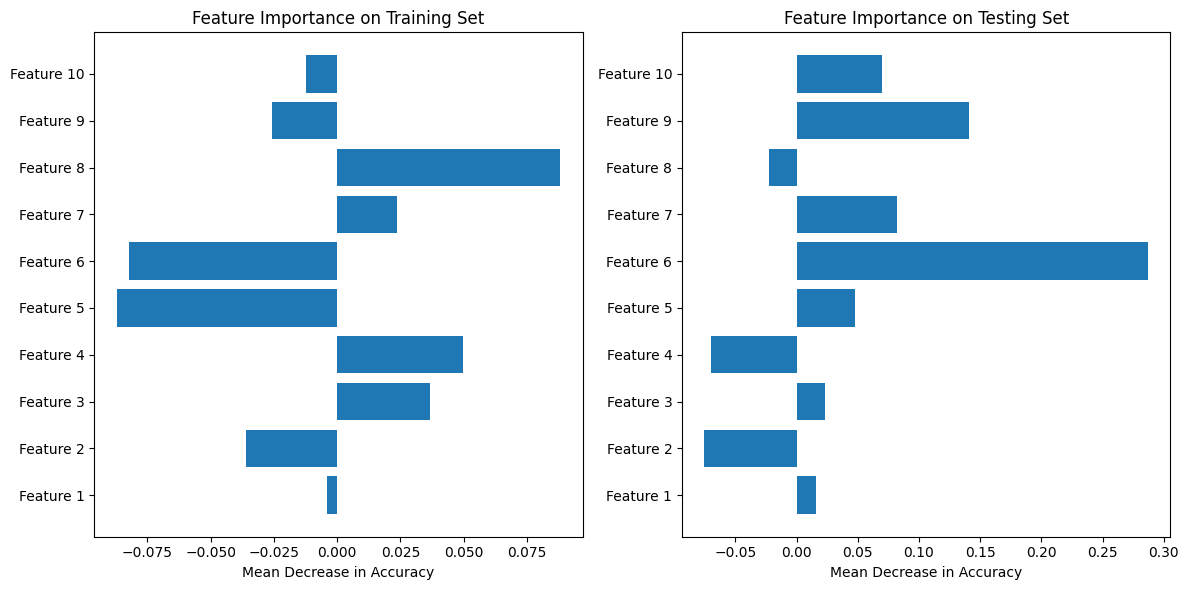

In [ ]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:


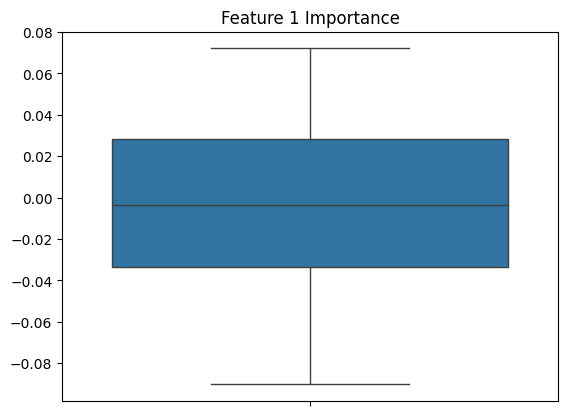

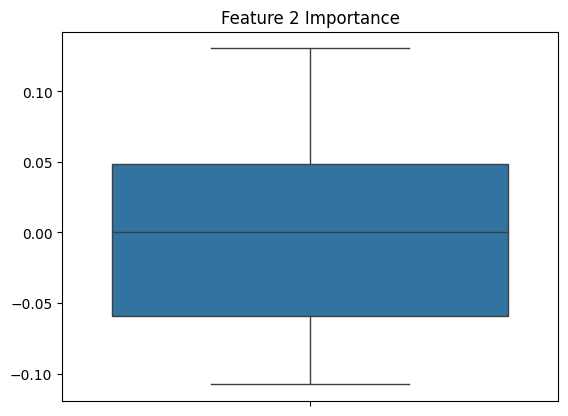

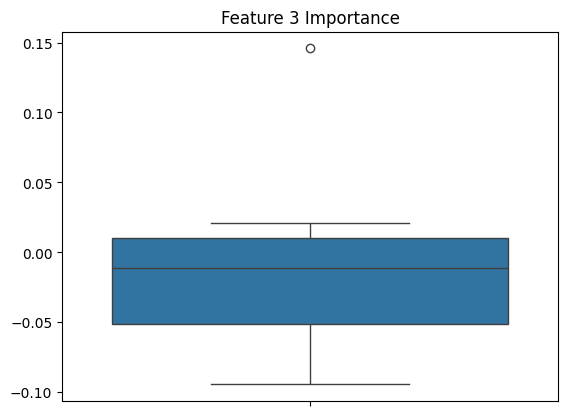

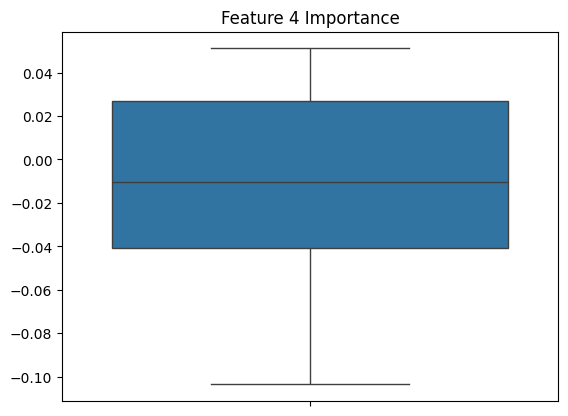

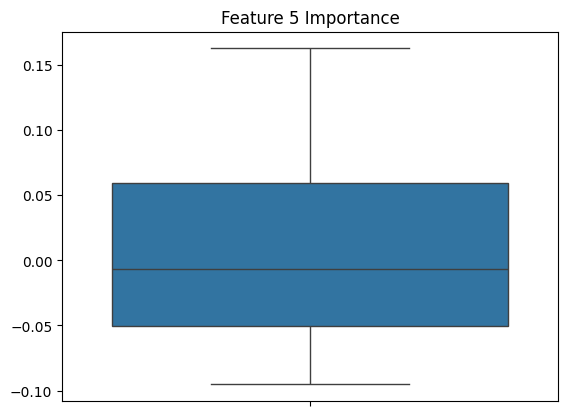

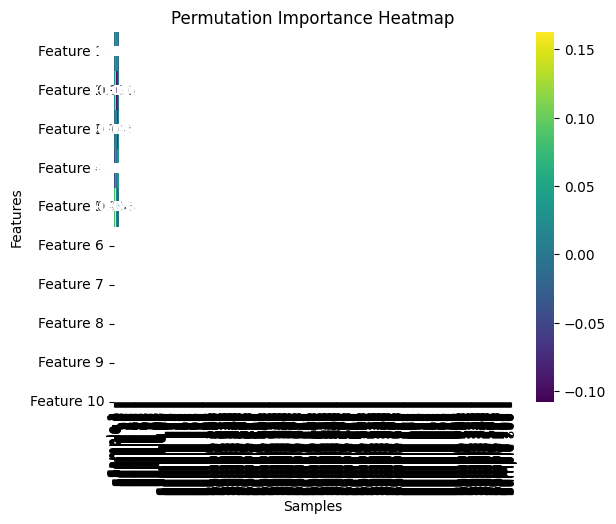

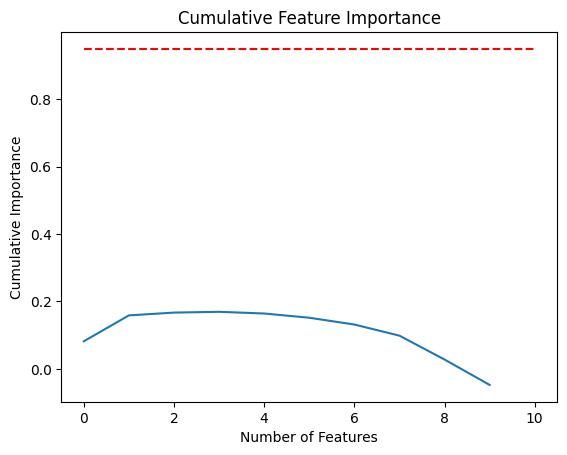

In [ ]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# Calculate permutation importance on training data
train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(x_train_reshaped.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


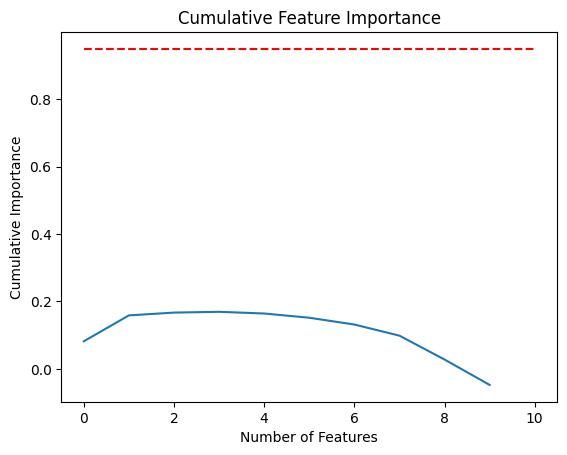

In [ ]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

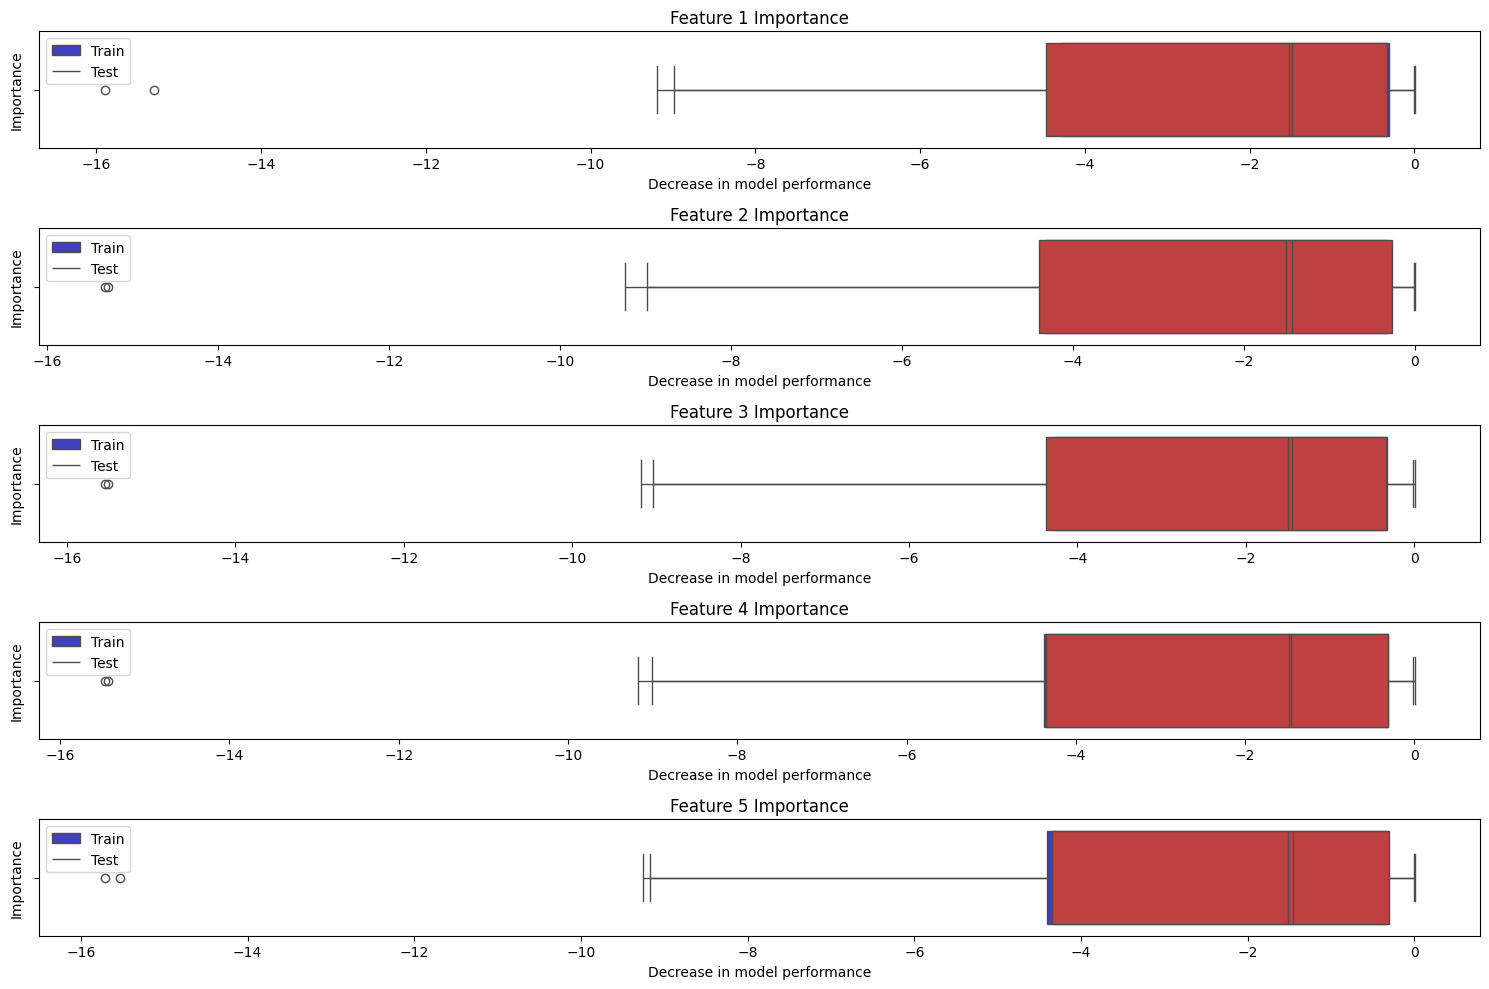

In [ ]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.



In [ ]:
features, test_results.importances_mean

(['Feature 1',
  'Feature 2',
  'Feature 3',
  'Feature 4',
  'Feature 5',
  'Feature 6',
  'Feature 7',
  'Feature 8',
  'Feature 9',
  'Feature 10'],
 array([ 0.01600745, -0.07543582,  0.02351771, -0.0695403 ,  0.04762474,
         0.28714616,  0.08210848, -0.02252417,  0.14085811,  0.06958521]))

In [ ]:
X_axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

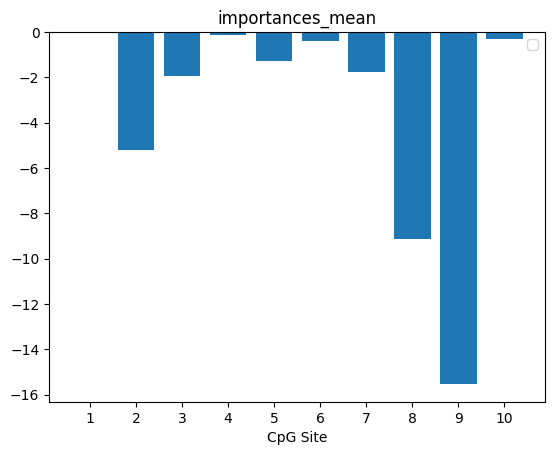

In [ ]:
# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


In [ ]:
shifts

[-0.4, -0.15, 0.1]

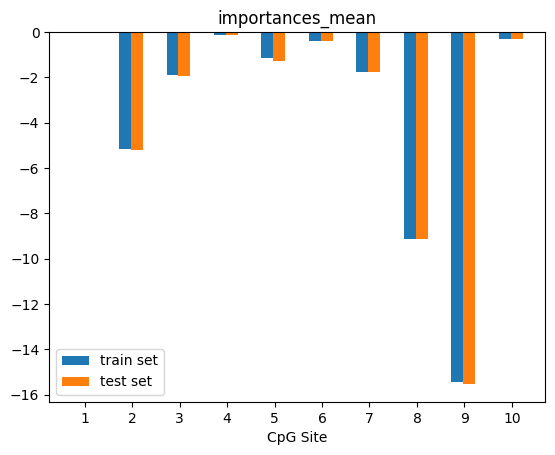

In [ ]:
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[2], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


In [ ]:
# X_axis2 = np.arange(11)
# for i in range(3):
#     counts = np.array([[0], test_results.importances_mean]) # [np.mean(np.round(samples_sums[i])==j) for j in range(11)]
#     plt.bar(X_axis2-shifts[i], counts, .25,label=celltypes[i])
# plt.legend()
# plt.title("Distribution of Number of Methylated Sites")
# plt.xlabel("Number of Methylated Sites")
# plt.xticks(X_axis2)
# plt.show()


# Use our BS generated data:

In [ ]:
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.ensemble import *
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.svm import SVC, SVR
# from sklearn.neural_network import MLPClassifier, MLPRegressor
# X = np.array(samples_sums).reshape(3*N_SAMPLES,-1)
# train_idx, test_idx = train_test_split(np.arange(N_SAMPLES*3), train_size=.75,random_state=42)
# train_idx, test_idx
# X_train, X_test = X[train_idx], X[test_idx]
# Y_train, Y_test = Y[train_idx], Y[test_idx]


In [ ]:
X = np.array(samples).reshape(3*N_SAMPLES,-1)
train_idx, test_idx = train_test_split(np.arange(N_SAMPLES*3), train_size=.75,random_state=42)

Y = np.repeat([0,50,100], N_SAMPLES)
x_train, x_test = X[train_idx], X[test_idx]
y_train, y_test = Y[train_idx], Y[test_idx]

x_train.shape, x_test.shape, y_train.shape, y_test.shape, X_train, X_test, y_train, y_test

((22500, 10),
 (7500, 10),
 (22500,),
 (7500,),
 array([[6.],
        [2.],
        [9.],
        ...,
        [9.],
        [3.],
        [1.]]),
 array([[9.],
        [4.],
        [2.],
        ...,
        [0.],
        [4.],
        [3.]]),
 array([100, 100,   0, ...,   0,  50, 100]),
 array([  0, 100, 100, ..., 100,  50, 100]))

Epoch 1/10
704/704 [==============================] - 4s 5ms/step - loss: 970.1404 - val_loss: 218.9528
Epoch 2/10
704/704 [==============================] - 2s 2ms/step - loss: 214.0001 - val_loss: 197.4338
Epoch 3/10
704/704 [==============================] - 2s 2ms/step - loss: 199.3451 - val_loss: 188.1381
Epoch 4/10
704/704 [==============================] - 2s 3ms/step - loss: 189.9243 - val_loss: 182.4835
Epoch 5/10
704/704 [==============================] - 4s 6ms/step - loss: 183.9334 - val_loss: 180.8497
Epoch 6/10
704/704 [==============================] - 7s 10ms/step - loss: 177.8350 - val_loss: 175.2760
Epoch 7/10
704/704 [==============================] - 5s 7ms/step - loss: 172.4017 - val_loss: 168.1159
Epoch 8/10
704/704 [==============================] - 5s 7ms/step - loss: 168.9774 - val_loss: 163.2689
Epoch 9/10
704/704 [==============================] - 5s 7ms/step - loss: 164.6295 - val_loss: 162.8263
Epoch 10/10
704/704 [==============================] - 3s 4ms/s

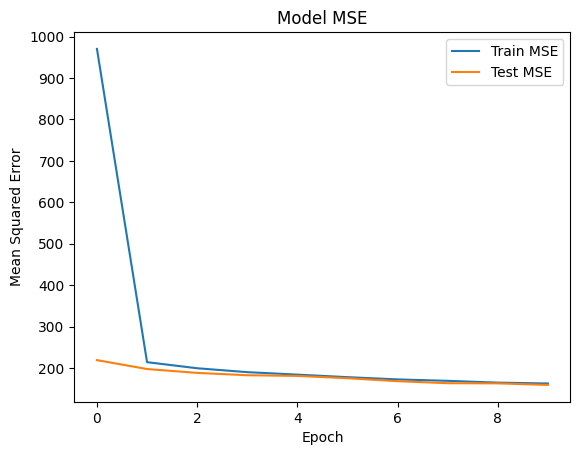

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100


# # Split the data into training and test sets
# X_train, X_test => x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and save history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


In [ ]:

def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


235/235 [==============================] - 1s 2ms/step
1D CNN: 33.34%


Epoch 1/100
704/704 [==============================] - 6s 6ms/step - loss: 897.6363 - val_loss: 238.5788
Epoch 2/100
704/704 [==============================] - 4s 6ms/step - loss: 225.2285 - val_loss: 209.9221
Epoch 3/100
704/704 [==============================] - 3s 4ms/step - loss: 203.8458 - val_loss: 191.7601
Epoch 4/100
704/704 [==============================] - 3s 4ms/step - loss: 191.8032 - val_loss: 183.9245
Epoch 5/100
704/704 [==============================] - 3s 4ms/step - loss: 185.5992 - val_loss: 179.4313
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 181.8391 - val_loss: 176.9374
Epoch 7/100
704/704 [==============================] - 3s 4ms/step - loss: 178.9710 - val_loss: 173.8392
Epoch 8/100
704/704 [==============================] - 2s 3ms/step - loss: 176.6118 - val_loss: 172.4267
Epoch 9/100
704/704 [==============================] - 2s 3ms/step - loss: 175.2021 - val_loss: 171.6084
Epoch 10/100
704/704 [==============================] -

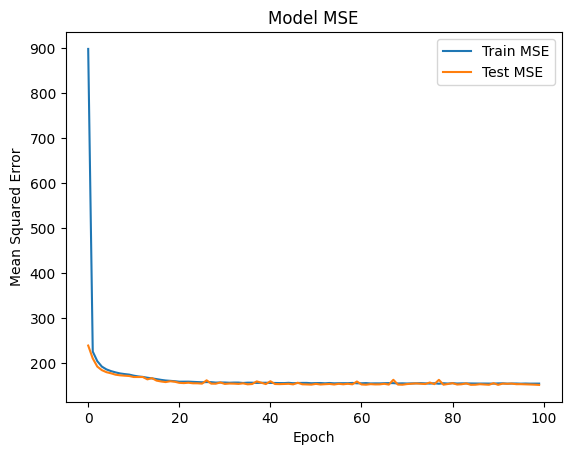

235/235 [==============================] - 0s 1ms/step
1D CNN: 33.34%


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100


# # Split the data into training and test sets
# X_train, X_test => x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and save history
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


Epoch 1/100
704/704 [==============================] - 7s 10ms/step - loss: 154.0975 - val_loss: 151.9049
Epoch 2/100
704/704 [==============================] - 2s 3ms/step - loss: 153.9809 - val_loss: 153.4565
Epoch 3/100
704/704 [==============================] - 2s 3ms/step - loss: 153.9763 - val_loss: 151.6509
Epoch 4/100
704/704 [==============================] - 2s 3ms/step - loss: 154.2496 - val_loss: 150.9027
Epoch 5/100
704/704 [==============================] - 2s 3ms/step - loss: 154.3981 - val_loss: 151.5889
Epoch 6/100
704/704 [==============================] - 2s 3ms/step - loss: 153.6205 - val_loss: 153.8611
Epoch 7/100
704/704 [==============================] - 3s 4ms/step - loss: 154.4221 - val_loss: 152.0506
Epoch 8/100
704/704 [==============================] - 2s 3ms/step - loss: 154.2200 - val_loss: 151.9910
Epoch 9/100
704/704 [==============================] - 2s 3ms/step - loss: 153.7854 - val_loss: 151.8179
Epoch 10/100
704/704 [==============================] 

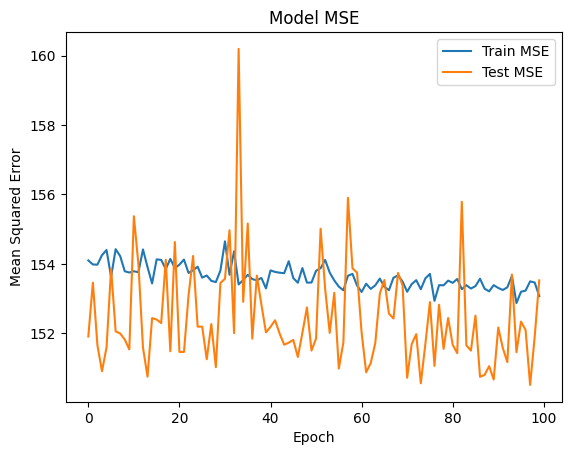

235/235 [==============================] - 0s 1ms/step
1D CNN: 33.35%


In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # # Create dummy data
# # x = np.random.rand(1200, 10, 1)
# # y = np.random.rand(1200) * 100


# # # Split the data into training and test sets
# # X_train, X_test => x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# Train the model and save history
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


In [ ]:
history_next.history['loss']

[154.0524444580078]

In [ ]:
history.history['loss'] += history_next.history['loss']
history.history

{'loss': [897.6362915039062,
  225.228515625,
  203.8457794189453,
  191.80323791503906,
  185.5991973876953,
  181.83912658691406,
  178.97096252441406,
  176.6117706298828,
  175.2021484375,
  174.0514678955078,
  171.67901611328125,
  169.9503173828125,
  168.88772583007812,
  167.06309509277344,
  165.64218139648438,
  164.03758239746094,
  162.32363891601562,
  160.9599151611328,
  160.1847381591797,
  159.35826110839844,
  158.27035522460938,
  158.31597900390625,
  158.38385009765625,
  157.89068603515625,
  157.4161834716797,
  156.9864044189453,
  157.43463134765625,
  157.22848510742188,
  156.2667236328125,
  156.513427734375,
  156.46847534179688,
  155.94284057617188,
  156.3269500732422,
  156.2968292236328,
  155.4481201171875,
  156.09620666503906,
  156.0602264404297,
  155.49765014648438,
  155.8159942626953,
  155.95266723632812,
  155.4686737060547,
  155.44378662109375,
  155.24151611328125,
  155.15744018554688,
  155.76434326171875,
  154.91009521484375,
  155.34

704/704 [==============================] - 5s 7ms/step - loss: 154.0524 - val_loss: 155.2276


ValueError: Input could not be cast to an at-least-1D NumPy array

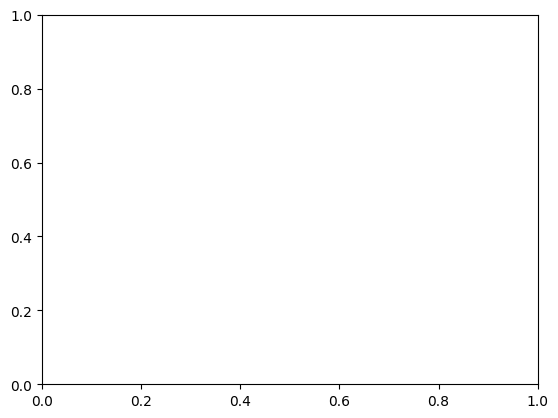

In [ ]:
# Train mode
n_epochs = 1

# Train the model and save history
history_next = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(x_test, y_test))

history.history['loss'].append(history_next.history['loss']) #, label='Train MSE')
history.history['val_loss'].append(history_next.history['val_loss'])

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


In [ ]:

# Y = np.repeat([0,50,100], N_SAMPLES)
# X_train, X_test = X[train_idx], X[test_idx]
# Y_train, Y_test = Y[train_idx], Y[test_idx]

# def predict_reg(f, X, Y):
#     preds = f.predict(X)
#     preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
#     return np.mean(preds012*50==Y)*100

# model = LinearRegression().fit(X_train,Y_train)
# print("GLM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

# print("####")
# model = DecisionTreeRegressor().fit(X_train,Y_train)
# print("Tree: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
# print("####")
# model = RandomForestRegressor().fit(X_train,Y_train)
# print("RF: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
# print("####")
# model = GradientBoostingRegressor().fit(X_train,Y_train)
# print("GBM: {:.2f}%".format(predict_reg(model, X_test, Y_test)))
# print("####")
# model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, Y_train)
# print("NN: {:.2f}%".format(predict_reg(model, X_test, Y_test)))

Epoch 1/100
704/704 [==============================] - 7s 8ms/step - loss: 637.4686 - val_loss: 211.2833
Epoch 2/100
704/704 [==============================] - 5s 7ms/step - loss: 200.0563 - val_loss: 188.1580
Epoch 3/100
704/704 [==============================] - 7s 9ms/step - loss: 189.0212 - val_loss: 181.9592
Epoch 4/100
704/704 [==============================] - 7s 10ms/step - loss: 180.8976 - val_loss: 174.8639
Epoch 5/100
704/704 [==============================] - 3s 5ms/step - loss: 172.5266 - val_loss: 163.7984
Epoch 6/100
704/704 [==============================] - 3s 5ms/step - loss: 166.9759 - val_loss: 162.1473
Epoch 7/100
704/704 [==============================] - 3s 5ms/step - loss: 163.3360 - val_loss: 158.1935
Epoch 8/100
704/704 [==============================] - 4s 6ms/step - loss: 161.3502 - val_loss: 155.0643
Epoch 9/100
704/704 [==============================] - 2s 4ms/step - loss: 160.1532 - val_loss: 155.9678
Epoch 10/100
704/704 [==============================] 

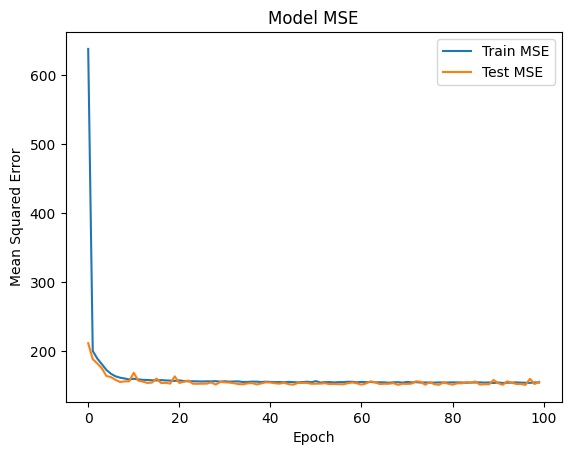

235/235 [==============================] - 0s 2ms/step
1D CNN: 33.35%


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100


# # Split the data into training and test sets
# X_train, X_test => x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the 1D CNN model
model = Sequential([
    Conv1D(163, kernel_size=5, activation='relu', input_shape=(10, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model and save history
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


In [ ]:
# Train mode
n_epochs = 1

# Train the model and save history
history_next = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(x_test, y_test))


704/704 [==============================] - 2s 3ms/step - loss: 154.1917 - val_loss: 154.6477


In [ ]:
history_next.history['loss'] + history_next.history['loss']

[154.31272888183594, 154.31272888183594]

In [ ]:
history.history['loss'] += history_next.history['loss']
history.history

{'loss': [637.4686279296875,
  200.05625915527344,
  189.021240234375,
  180.89759826660156,
  172.52655029296875,
  166.97586059570312,
  163.33602905273438,
  161.35023498535156,
  160.1532440185547,
  158.79098510742188,
  159.75843811035156,
  158.82371520996094,
  158.24032592773438,
  157.97946166992188,
  157.64382934570312,
  157.3290252685547,
  157.8578338623047,
  157.4115753173828,
  157.1027374267578,
  156.6826171875,
  157.41127014160156,
  156.5013885498047,
  156.05526733398438,
  156.1761932373047,
  156.02877807617188,
  155.8291473388672,
  156.06808471679688,
  155.98638916015625,
  156.3010711669922,
  155.59283447265625,
  156.2055206298828,
  155.54400634765625,
  155.85601806640625,
  155.93663024902344,
  155.08692932128906,
  155.19744873046875,
  155.62661743164062,
  155.57989501953125,
  155.03761291503906,
  155.53176879882812,
  155.1831817626953,
  154.96429443359375,
  154.99789428710938,
  154.65951538085938,
  155.2369842529297,
  154.88282775878906,

In [ ]:
history.history['val_loss'] += history_next.history['val_loss']
history.history

{'loss': [637.4686279296875,
  200.05625915527344,
  189.021240234375,
  180.89759826660156,
  172.52655029296875,
  166.97586059570312,
  163.33602905273438,
  161.35023498535156,
  160.1532440185547,
  158.79098510742188,
  159.75843811035156,
  158.82371520996094,
  158.24032592773438,
  157.97946166992188,
  157.64382934570312,
  157.3290252685547,
  157.8578338623047,
  157.4115753173828,
  157.1027374267578,
  156.6826171875,
  157.41127014160156,
  156.5013885498047,
  156.05526733398438,
  156.1761932373047,
  156.02877807617188,
  155.8291473388672,
  156.06808471679688,
  155.98638916015625,
  156.3010711669922,
  155.59283447265625,
  156.2055206298828,
  155.54400634765625,
  155.85601806640625,
  155.93663024902344,
  155.08692932128906,
  155.19744873046875,
  155.62661743164062,
  155.57989501953125,
  155.03761291503906,
  155.53176879882812,
  155.1831817626953,
  154.96429443359375,
  154.99789428710938,
  154.65951538085938,
  155.2369842529297,
  154.88282775878906,

704/704 [==============================] - 6s 8ms/step - loss: 153.8161 - val_loss: 152.6182


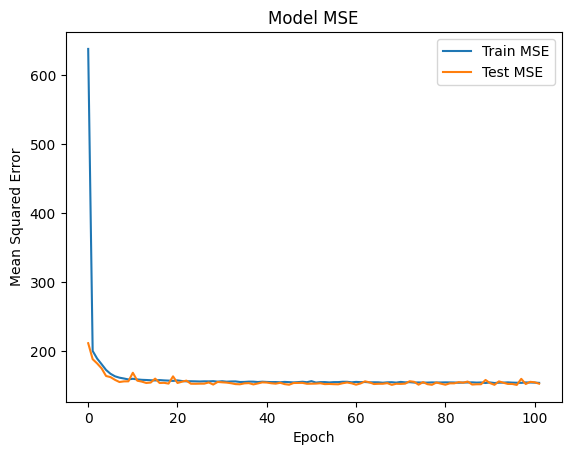

235/235 [==============================] - 1s 3ms/step
1D CNN: 33.35%


In [ ]:
# Train mode
n_epochs = 1

# Train the model and save history
history_next = model.fit(x_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(x_test, y_test))

# history.history['loss'].append(history_next.history['loss']) #, label='Train MSE')
# history.history['val_loss'].append(history_next.history['val_loss'])

history.history['loss'] += history_next.history['loss']
history.history['val_loss'] += history_next.history['val_loss']
# history.history

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model MSE')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


def predict_reg(f, X, Y):
    preds = f.predict(X)
    preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    return np.mean(preds012*50==Y)*100

print("1D CNN: {:.2f}%".format(predict_reg(model, x_test, y_test)))


# Feature importance !

235/235 [==============================] - 0s 2ms/step


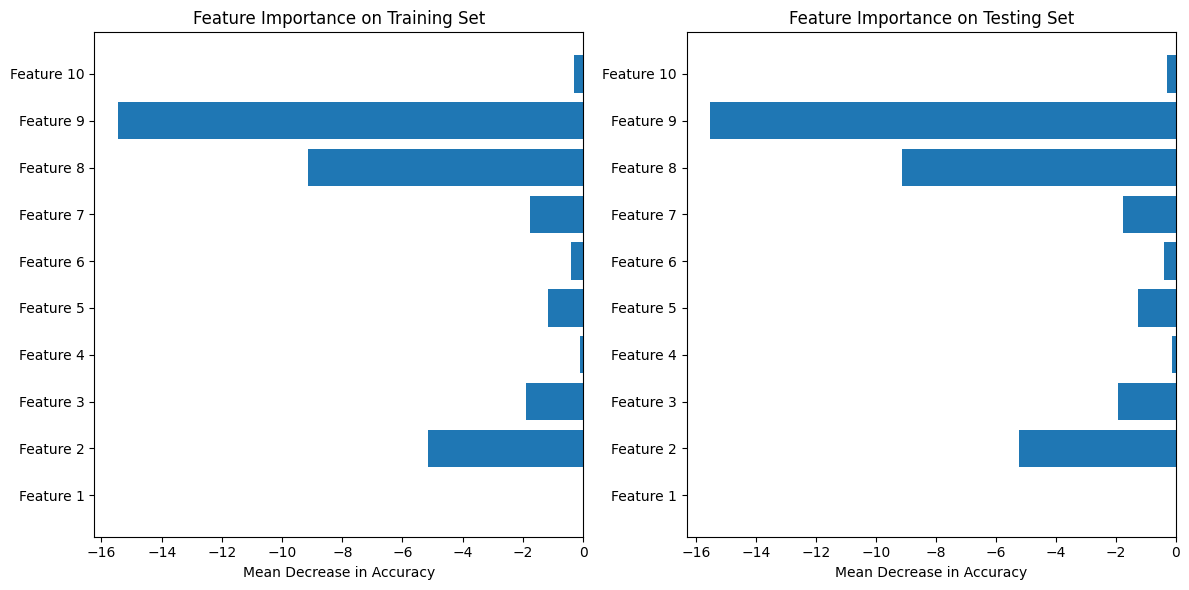

In [ ]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

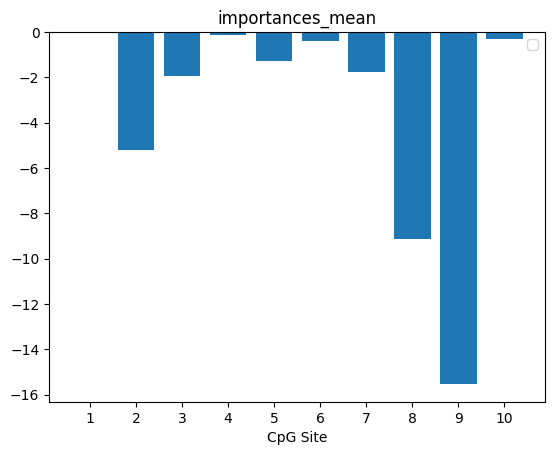

In [ ]:
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()

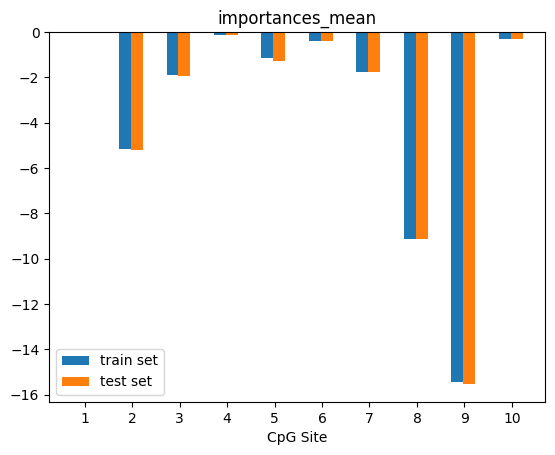

In [ ]:
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[2], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


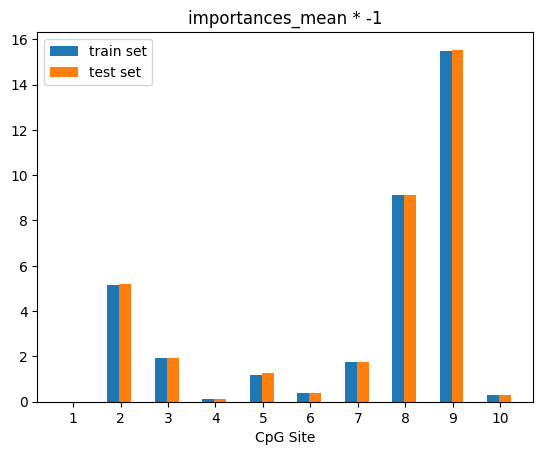

In [ ]:
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[2], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[ 8  1  2  3  4  5  6  7  9 10]
 [ 2  9  3  5  6  4  1  7  8 10]
 [ 8  7  1  2  3  4  5  6  9 10]]
[[ 0.          0.          0.          0.          0.          0.
   0.          0.82612675  0.          0.        ]
 [ 0.          8.67689941  1.79937736  0.39209448  1.01563401  0.46944182
   0.          0.          8.13790199  0.        ]
 [ 0.23888081  0.          0.          0.          0.          0.
   1.41448469 16.02706242  0.          0.        ]]


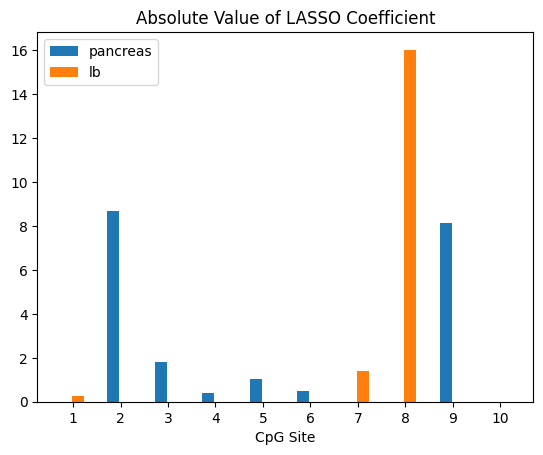

In [ ]:
for i in range(1,3):
    plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


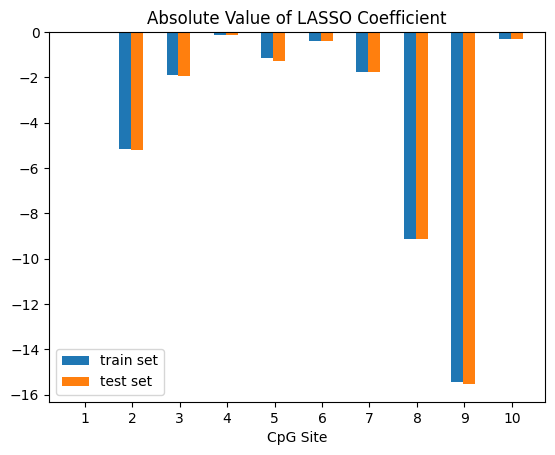

In [ ]:
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[2], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.show()


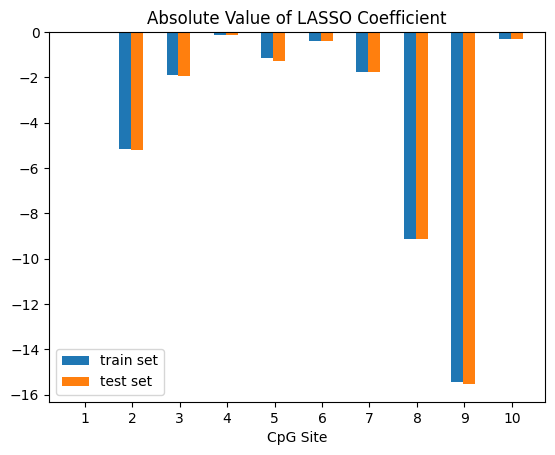

In [ ]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.



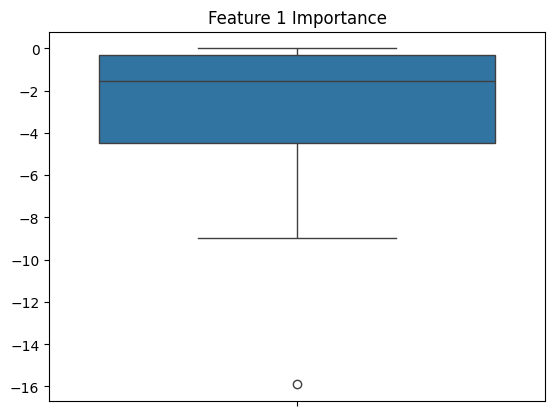

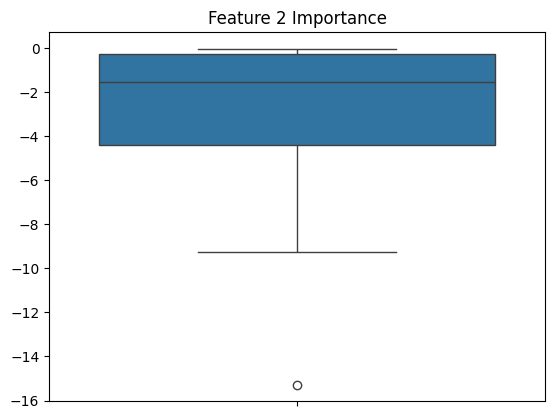

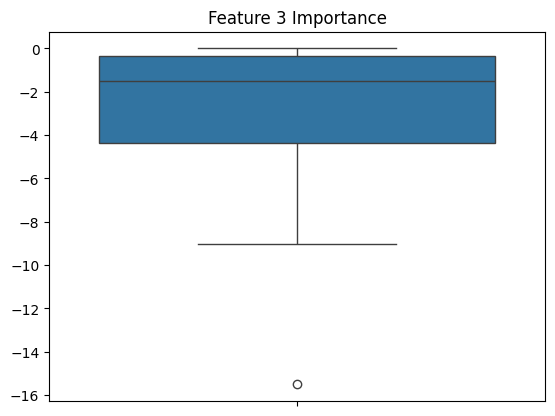

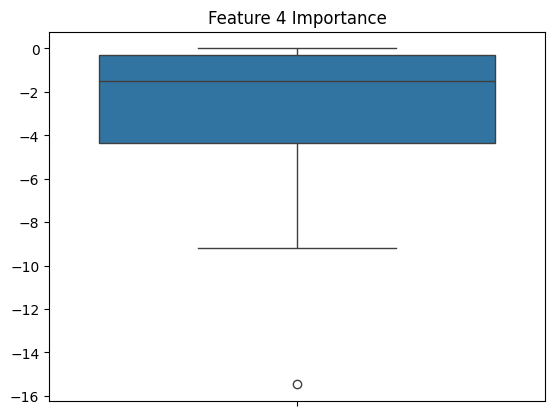

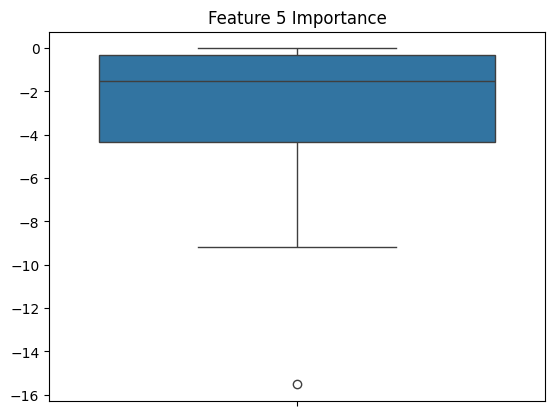

In [ ]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# Assuming 'results' is the output from permutation_importance

results = test_results

# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(x_train_reshaped.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


In [ ]:
train_results.importances.shape

(10, 5)

In [ ]:
train_results.importances

array([[-5.12990168e-03, -2.90709332e-03, -9.72609888e-03,
        -1.09648152e-02,  8.01158404e-04],
       [-5.05778266e+00, -5.12295381e+00, -5.07331645e+00,
        -5.19796393e+00, -5.25104225e+00],
       [-1.92345291e+00, -1.93363244e+00, -1.89706179e+00,
        -1.91272147e+00, -1.87960157e+00],
       [-1.16850346e-01, -1.03527150e-01, -1.05245226e-01,
        -1.17383440e-01, -1.21324871e-01],
       [-1.14361284e+00, -1.15938782e+00, -1.14035025e+00,
        -1.17978707e+00, -1.16996885e+00],
       [-4.04613539e-01, -3.92314970e-01, -3.86243835e-01,
        -3.98464429e-01, -4.01402824e-01],
       [-1.82261017e+00, -1.72154690e+00, -1.76906627e+00,
        -1.72840198e+00, -1.75572688e+00],
       [-9.19782512e+00, -8.98703169e+00, -9.17838799e+00,
        -9.00739004e+00, -9.25667855e+00],
       [-1.52943284e+01, -1.53252349e+01, -1.55494893e+01,
        -1.54326923e+01, -1.57124467e+01],
       [-2.81835256e-01, -2.99513397e-01, -3.09452157e-01,
        -2.84778738e-01

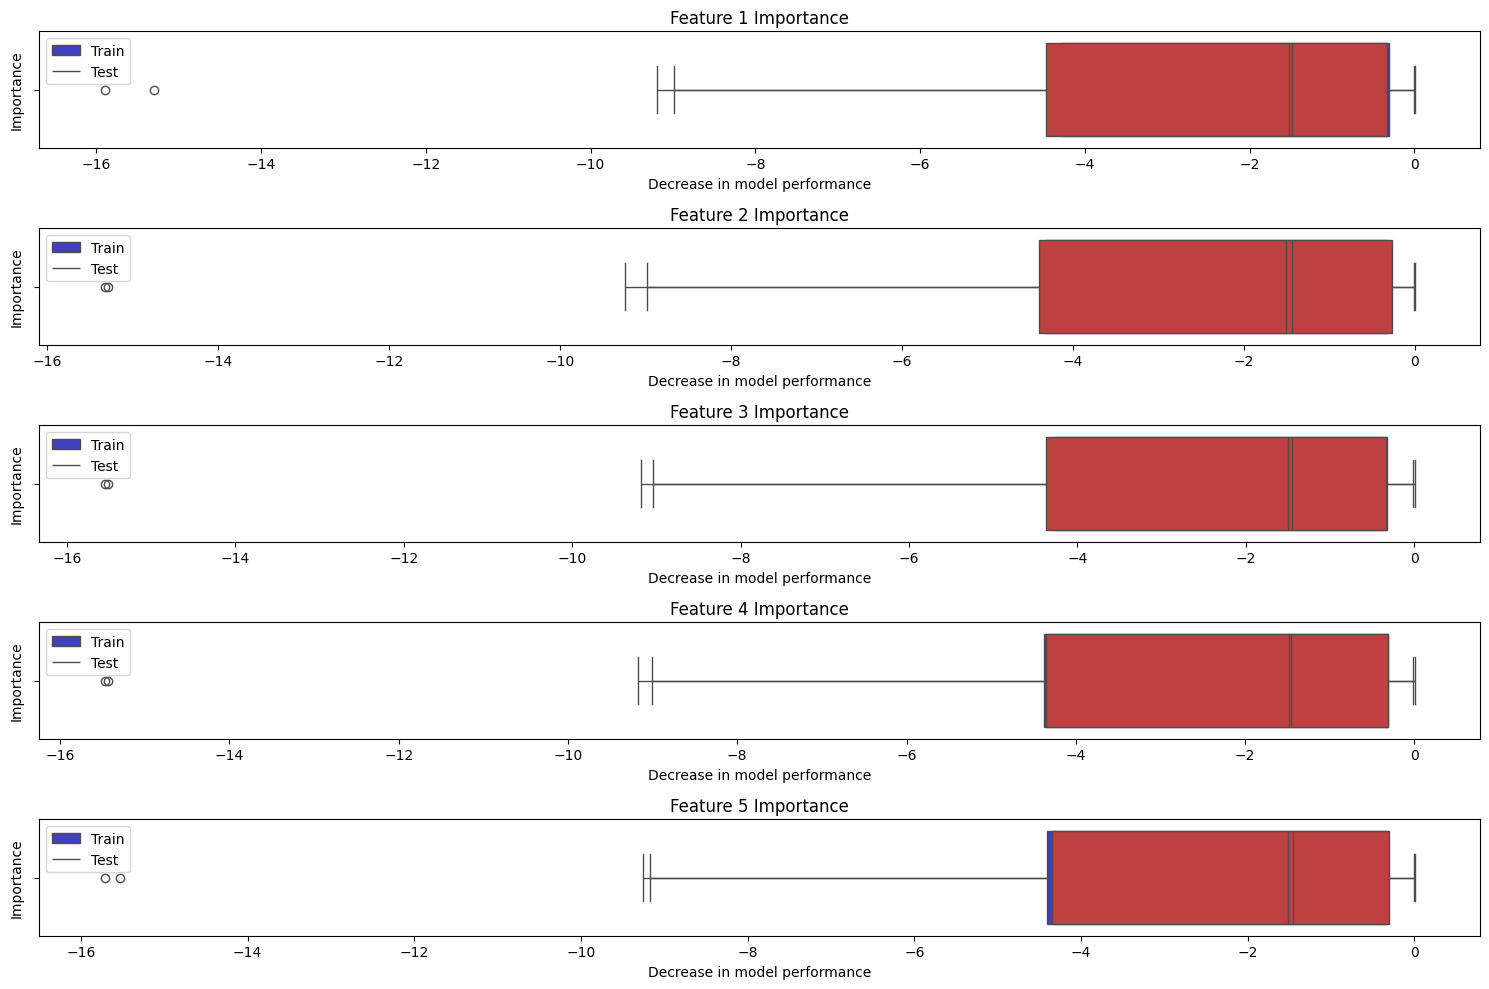

In [ ]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.



In [ ]:
y_test

array([  0, 100, 100, ..., 100,  50, 100])

(array([2515.,    0.,    0.,    0.,    0., 2476.,    0.,    0.,    0.,
        2509.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

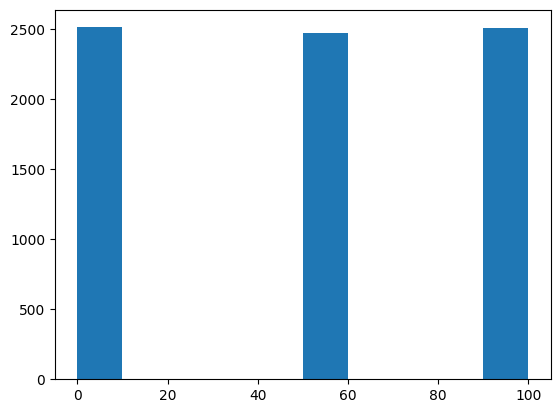

In [ ]:
plt.hist(y_test)

In [ ]:
x